In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
num_of_data = 515345
num_of_dim = 90
num_of_party = 3
num_of_sample = 1000
num_of_center = 10
num_more_sample = 5000

# Plot for Kmeans Clustering

In [21]:
def kmeans_comm(n_data, n_dim):
    return n_data * n_dim

def uniform_comm(n_size, n_party):
    return n_size * n_party

def coreset_comm(n_size, n_party):
    return n_party + n_size * (3 * n_party)

def uniform_kmeans_comm(n_size, n_party, n_dim):
    return uniform_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def coreset_kmeans_comm(n_size, n_party, n_dim):
    return coreset_comm(n_size, n_party) + kmeans_comm(n_size, n_dim)

def distkmeans_comm(n_data, n_party, n_dim, n_center):
    return n_dim * n_center + n_data * n_party

def uniform_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return uniform_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

def coreset_distkmeans_comm(n_size, n_party, n_dim, n_center):
    return coreset_comm(n_size, n_party) + distkmeans_comm(n_size, n_party, n_dim, n_center)

In [127]:
def box_plot(data, ax, labels, edge_color, fill_color):
    bp = ax.boxplot(data, labels = labels, patch_artist=True, widths=0.6)
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

def set_box_color(bp, color, fill_color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

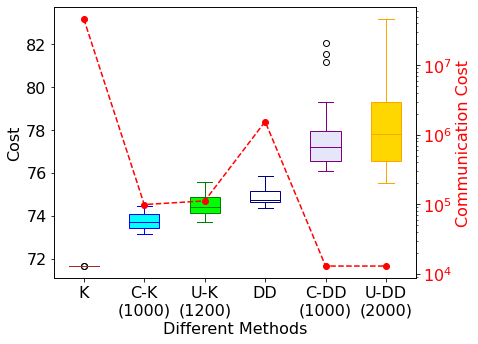

In [176]:
a = np.load("./res/kmeans-res/kmeans-10c.npy")
b = np.load("./res/kmeans-res/kmeans-coreset-10c1000s.npy")
c = np.load("./res/kmeans-res/kmeans-uniform-10c1200s.npy")
d = np.load("./res/kmeans-res/distkmeans-10c.npy")
e = np.load("./res/kmeans-res/distkmeans-coreset-10c1000s.npy")
f = np.load("./res/kmeans-res/distkmeans-uniform-10c2000s.npy")

a_comm = kmeans_comm(num_of_data, num_of_dim)
b_comm = coreset_kmeans_comm(num_of_sample, num_of_party, num_of_dim)
c_comm = uniform_kmeans_comm(1200, num_of_party, num_of_dim)
d_comm = distkmeans_comm(num_of_data, num_of_party, num_of_dim, num_of_center)
e_comm = coreset_distkmeans_comm(num_of_sample, num_of_party, num_of_dim, num_of_center)
f_comm = uniform_distkmeans_comm(2000, num_of_party, num_of_dim, num_of_center)

cost_seq = [a,b,c,d,e,f]
comm_seq = [a_comm,b_comm,c_comm,d_comm,e_comm,f_comm]
labels = ['K','C+K','U+K','D','C+D','U+D']

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Cost',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['K'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-K\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=['U-K\n(1200)'])
bp4 = ax1.boxplot([d], positions=[4], widths=0.5, patch_artist=True,labels=['DD'])
bp5 = ax1.boxplot([e], positions=[5], widths=0.5, patch_artist=True,labels=['C-DD\n(1000)'])
bp6 = ax1.boxplot([f], positions=[6], widths=0.5, patch_artist=True,labels=['U-DD\n(2000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'navy', 'white')
set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=16)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Cost', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5,6], comm_seq, 'ro--')
plt.savefig("kmeansdm.pdf", bbox_inches='tight')
plt.show()

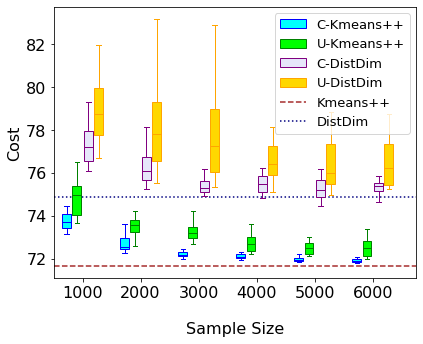

In [181]:
a1 = np.load('./res/kmeans-res/kmeans-coreset-10c1000s.npy')
b1 = np.load('./res/kmeans-res/kmeans-coreset-10c2000s.npy')
c1 = np.load('./res/kmeans-res/kmeans-coreset-10c3000s.npy')
d1 = np.load('./res/kmeans-res/kmeans-coreset-10c4000s.npy')
e1 = np.load('./res/kmeans-res/kmeans-coreset-10c5000s.npy')
f1 = np.load('./res/kmeans-res/kmeans-coreset-10c6000s.npy')

a2 = np.load('./res/kmeans-res/distkmeans-coreset-10c1000s.npy')
b2 = np.load('./res/kmeans-res/distkmeans-coreset-10c2000s.npy')
c2 = np.load('./res/kmeans-res/distkmeans-coreset-10c3000s.npy')
d2 = np.load('./res/kmeans-res/distkmeans-coreset-10c4000s.npy')
e2 = np.load('./res/kmeans-res/distkmeans-coreset-10c5000s.npy')
f2 = np.load('./res/kmeans-res/distkmeans-coreset-10c6000s.npy')

a3 = np.load('./res/kmeans-res/kmeans-uniform-10c1000s.npy')
b3 = np.load('./res/kmeans-res/kmeans-uniform-10c2000s.npy')
c3 = np.load('./res/kmeans-res/kmeans-uniform-10c3000s.npy')
d3 = np.load('./res/kmeans-res/kmeans-uniform-10c4000s.npy')
e3 = np.load('./res/kmeans-res/kmeans-uniform-10c5000s.npy')
f3 = np.load('./res/kmeans-res/kmeans-uniform-10c6000s.npy')

a4 = np.load('./res/kmeans-res/distkmeans-uniform-10c1000s.npy')
b4 = np.load('./res/kmeans-res/distkmeans-uniform-10c2000s.npy')
c4 = np.load('./res/kmeans-res/distkmeans-uniform-10c3000s.npy')
d4 = np.load('./res/kmeans-res/distkmeans-uniform-10c4000s.npy')
e4 = np.load('./res/kmeans-res/distkmeans-uniform-10c5000s.npy')
f4 = np.load('./res/kmeans-res/distkmeans-uniform-10c6000s.npy')

k = np.load('./res/kmeans-res/kmeans-10c.npy')
d = np.load('./res/kmeans-res/distkmeans-10c.npy')

k = np.mean(k)
d = np.mean(d)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')
lined = plt.axhline(y=d, color='navy', linestyle=':')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek, lined], \
           ['C-Kmeans++', 'U-Kmeans++', 'C-DistDim', 'U-DistDim', 'Kmeans++','DistDim'], loc='upper right', prop = {'size':13})

plt.savefig("kmeansds.pdf", bbox_inches='tight')
plt.show()

# Plot for Ridge Regression

In [183]:
def centralized_comm(n_data, n_dim):
    return n_data * n_dim

def uniform_comm(n_size, n_party):
    return n_size * n_party

def coreset_comm(n_size, n_party):
    return n_party + n_size * (3 * n_party)

def uniform_centralized_comm(n_size, n_party, n_dim):
    return uniform_comm(n_size, n_party) + centralized_comm(n_size, n_dim)

def coreset_centralized_comm(n_size, n_party, n_dim):
    return coreset_comm(n_size, n_party) + centralized_comm(n_size, n_dim)

def saga_comm(n_party, n_dim, n_iter):
    return (n_dim * n_party * 2 + 3 * n_party) * n_iter

def uniform_saga_comm(n_size, n_party, n_dim, n_iter):
    return uniform_comm(n_size, n_party) + saga_comm(n_party, n_dim, n_iter)

def coreset_saga_comm(n_size, n_party, n_dim, n_iter):
    return coreset_comm(n_size, n_party) + saga_comm(n_party, n_dim, n_iter)

In [184]:
num_of_data = 463715
num_of_dim = 90
num_of_party = 3

7631.75
7973.65


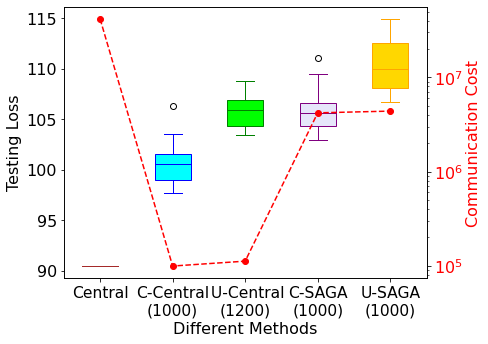

In [219]:
a = np.load("./res/ridge/ridge-centralized-test.npy")
b = np.load("./res/ridge/ridge-centralized-c1000s-test.npy")
c = np.load("./res/ridge/ridge-centralized-u1200s-test.npy")

e = np.load("./res/ridge/ridge-saga-c1000s-test.npy")
f = np.load("./res/ridge/ridge-saga-u1000s-test.npy")

e_iter = np.load("./res/ridge/ridge-saga-c1000s-iter.npy")
f_iter = np.load("./res/ridge/ridge-saga-u1000s-iter.npy")

e_iter = np.mean(e_iter)
f_iter = np.mean(f_iter)

print(e_iter)
print(f_iter)

a_comm = centralized_comm(num_of_data, num_of_dim)
b_comm = coreset_centralized_comm(1000, num_of_party, num_of_dim)
c_comm = uniform_centralized_comm(1200, num_of_party, num_of_dim)

e_comm = coreset_saga_comm(1000, num_of_party, num_of_dim, e_iter)
f_comm = uniform_saga_comm(1000, num_of_party, num_of_dim, f_iter)

cost_seq = [a,b,c,e,f]
comm_seq = [a_comm,b_comm,c_comm,e_comm,f_comm]

fig, ax1 = plt.subplots(figsize=(6.5,5))
ax1.set_xlabel('Different Methods',fontsize=16)
ax1.set_ylabel('Testing Loss',fontsize=16)
#ax1.tick_params(axis='y', labelcolor='blue')
#bp = box_plot(cost_seq, ax1, labels, 'blue', 'white')
bp1 = ax1.boxplot([a], positions=[1], widths=0.5, patch_artist=True,labels=['Central'])
bp2 = ax1.boxplot([b], positions=[2], widths=0.5, patch_artist=True,labels=['C-Central\n(1000)'])
bp3 = ax1.boxplot([c], positions=[3], widths=0.5, patch_artist=True,labels=[' U-Central\n(1200)'])

bp5 = ax1.boxplot([e], positions=[4], widths=0.5, patch_artist=True,labels=['C-SAGA\n(1000)'])
bp6 = ax1.boxplot([f], positions=[5], widths=0.5, patch_artist=True,labels=['U-SAGA\n(1000)'])

set_box_color(bp1, 'brown', 'white')
set_box_color(bp2, 'blue', 'cyan')
set_box_color(bp3, 'green', 'lime')

set_box_color(bp5, 'purple', 'lavender')
set_box_color(bp6, 'orange', 'gold')

ax1.tick_params(axis='x',labelsize=15.5)
ax1.tick_params(axis='y',labelsize=16)

ax2 = ax1.twinx()
ax2.set_ylabel('Communication Cost', color='red',fontsize=16)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red',labelsize=16)
ax2.plot([1,2,3,4,5], comm_seq, 'ro--')
plt.savefig("ridgedm.pdf", bbox_inches='tight')
plt.show()

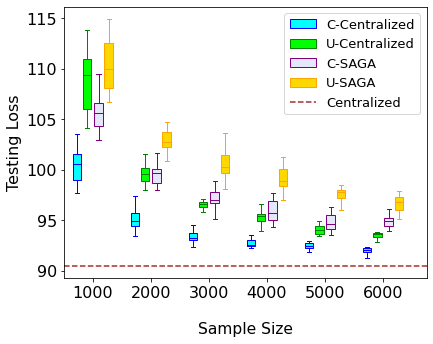

In [220]:
a1 = np.load('./res/ridge/ridge-centralized-c1000s-test.npy')
b1 = np.load('./res/ridge/ridge-centralized-c2000s-test.npy')
c1 = np.load('./res/ridge/ridge-centralized-c3000s-test.npy')
d1 = np.load('./res/ridge/ridge-centralized-c4000s-test.npy')
e1 = np.load('./res/ridge/ridge-centralized-c5000s-test.npy')
f1 = np.load('./res/ridge/ridge-centralized-c6000s-test.npy')

a2 = np.load('./res/ridge/ridge-saga-c1000s-test.npy')
b2 = np.load('./res/ridge/ridge-saga-c2000s-test.npy')
c2 = np.load('./res/ridge/ridge-saga-c3000s-test.npy')
d2 = np.load('./res/ridge/ridge-saga-c4000s-test.npy')
e2 = np.load('./res/ridge/ridge-saga-c5000s-test.npy')
f2 = np.load('./res/ridge/ridge-saga-c6000s-test.npy')

a3 = np.load('./res/ridge/ridge-centralized-u1000s-test.npy')
b3 = np.load('./res/ridge/ridge-centralized-u2000s-test.npy')
c3 = np.load('./res/ridge/ridge-centralized-u3000s-test.npy')
d3 = np.load('./res/ridge/ridge-centralized-u4000s-test.npy')
e3 = np.load('./res/ridge/ridge-centralized-u5000s-test.npy')
f3 = np.load('./res/ridge/ridge-centralized-u6000s-test.npy')

a4 = np.load('./res/ridge/ridge-saga-u1000s-test.npy')
b4 = np.load('./res/ridge/ridge-saga-u2000s-test.npy')
c4 = np.load('./res/ridge/ridge-saga-u3000s-test.npy')
d4 = np.load('./res/ridge/ridge-saga-u4000s-test.npy')
e4 = np.load('./res/ridge/ridge-saga-u5000s-test.npy')
f4 = np.load('./res/ridge/ridge-saga-u6000s-test.npy')


k = np.load('./res/ridge/ridge-centralized-test.npy')

k = np.mean(k)

data1 = [a1,b1,c1,d1,e1,f1]
data2 = [a2,b2,c2,d2,e2,f2]
data3 = [a3,b3,c3,d3,e3,f3]
data4 = [a4,b4,c4,d4,e4,f4]

ticks = ['1000\n','2000','3000','4000','5000','6000'] 

plt.figure(figsize=(6.5,5))

linek = plt.axhline(y=k, color='brown', linestyle='--')

bp1 = plt.boxplot(data1, positions=np.array(range(len(data1)))*4.0-1.1, sym='', widths=0.6, patch_artist=True)
bp3 = plt.boxplot(data3, positions=np.array(range(len(data3)))*4.0-0.4, sym='', widths=0.6, patch_artist=True)
bp2 = plt.boxplot(data2, positions=np.array(range(len(data2)))*4.0+0.4, sym='', widths=0.6, patch_artist=True)
bp4 = plt.boxplot(data4, positions=np.array(range(len(data4)))*4.0+1.1, sym='', widths=0.6, patch_artist=True)
set_box_color(bp1, 'blue', 'cyan') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'purple', 'lavender')
set_box_color(bp3, 'green', 'lime')
set_box_color(bp4, 'orange', 'gold')

plt.xticks(range(0, len(ticks) * 4, 4), ticks, fontsize=16)
plt.xlim(-2, len(ticks)*4-1)
plt.yticks(fontsize=16)

plt.xlabel('Sample Size', fontsize=15.5)
plt.ylabel('Testing Loss', fontsize=16)

plt.legend([bp1["boxes"][0], bp3["boxes"][0], bp2["boxes"][0], bp4["boxes"][0], linek], \
           ['C-Centralized', 'U-Centralized', 'C-SAGA', 'U-SAGA', 'Centralized'], loc='upper right', prop = {'size':13})

plt.savefig("ridgeds.pdf", bbox_inches='tight')
plt.show()